# Error Handling

### Three types of errors: 1.same name 2.empty descriptions 3. empty categories

In [1]:
import pandas as pd
# df=pd.read_csv("amazon.csv")
# df.tail()

In [2]:
# df1=df
# for i in range(len(df.index)):
#     df['product_name'].iloc[i]=df.iloc[i]['product_name']+str(i)
#     #print(df.iloc[i]['product_name']+str(i))
# df.to_csv("amazon2.csv", index=False)
# df1['product_name'].iloc[0]

In [75]:
df=pd.read_csv('amazon2.csv')
df.tail()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
9995,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,5 new,3,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,NaN,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig..."
9996,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,£39.99,NaN,1,3.0,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,... what I see my grandson us going to have fu...,NaN
9997,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop Replica9997,Olde Scotland Yard Ltd.,£43.99,3 new,1,3.0,5.0 out of 5 stars,Novelty & Special Use > Novelty > Accessories ...,NaN,*Includes 1x Badge with holder and chain *High...,Technical Details Item Weight159 g Product Dim...,*Includes 1x Badge with holder and chain *High...,http://www.amazon.co.uk/Olde-Scotland-Yard-Ltd...,NaN,Five Stars // 5.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>[{""Seller_name_1""=>""YUK"", ""Seller_p..."
9998,cd783d0b8b44e631b9788b203eaaefae,Justice League of America Series 3 Green Lante...,DC Comics,£49.81,3 new,1,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,NaN,Designed by Ed BenesIt's here - the third seri...,Technical Details Item Weight181 g Product Dim...,Designed by Ed BenesIt's here - the third seri...,NaN,NaN,The best sculpt in a while // 5.0 // 13 May 20...,"{""seller""=>[{""Seller_name_1""=>""Smaller World F..."
9999,94d18e86e504bee1e392df7e5738b18a,Star Wars 1/72 Y-Wing Starfighter9999,Bandai,£21.20,31 new,11,3.0,4.5 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Bandai-Star-Wars-Fight...,NaN,Technical Details Item Weight299 g Product Dim...,NaN,NaN,NaN,Gold leader // 5.0 // 31 Aug. 2015 // By\n ...,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10000 non-null  object 
 1   product_name                                 10000 non-null  object 
 2   manufacturer                                 9993 non-null   object 
 3   price                                        8565 non-null   object 
 4   number_available_in_stock                    7500 non-null   object 
 5   number_of_reviews                            9982 non-null   object 
 6   number_of_answered_questions                 9235 non-null   float64
 7   average_review_rating                        9982 non-null   object 
 8   amazon_category_and_sub_category             9310 non-null   object 
 9   customers_who_bought_this_item_also_bought   8938 non-null   object 
 10 

In [5]:
df.isna().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price                                          1435
number_available_in_stock                      2500
number_of_reviews                                18
number_of_answered_questions                    765
average_review_rating                            18
amazon_category_and_sub_category                690
customers_who_bought_this_item_also_bought     1062
description                                     651
product_information                              58
product_description                             651
items_customers_buy_after_viewing_this_item    3065
customer_questions_and_answers                 9086
customer_reviews                                 21
sellers                                        3082
dtype: int64

In [6]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Predicting missing Categories of products with the help of description and name

In [7]:
df.amazon_category_and_sub_category[1]

'Hobbies > Model Trains & Railway Sets > Rail Vehicles > Trains'

In [8]:
df.amazon_category_and_sub_category[1].index(' >')

7

In [9]:
df.amazon_category_and_sub_category[1]

'Hobbies > Model Trains & Railway Sets > Rail Vehicles > Trains'

## Category Series

In [10]:
category = pd.Series(df['amazon_category_and_sub_category'].fillna('Buffer'))
category

0       Hobbies > Model Trains & Railway Sets > Rail V...
1       Hobbies > Model Trains & Railway Sets > Rail V...
2       Hobbies > Model Trains & Railway Sets > Rail V...
3       Hobbies > Model Trains & Railway Sets > Rail V...
4       Hobbies > Model Trains & Railway Sets > Rail V...
                              ...                        
9995    Hobbies > Collectible Figures & Memorabilia > ...
9996               Characters & Brands > Star Wars > Toys
9997    Novelty & Special Use > Novelty > Accessories ...
9998    Hobbies > Collectible Figures & Memorabilia > ...
9999               Characters & Brands > Star Wars > Toys
Name: amazon_category_and_sub_category, Length: 10000, dtype: object

In [11]:
category.unique()

array(['Hobbies > Model Trains & Railway Sets > Rail Vehicles > Trains',
       'Hobbies > Model Trains & Railway Sets > Lighting & Signal Engineering > Lamps & Lighting',
       'Hobbies > Model Trains & Railway Sets > Rail Vehicles > Locomotives',
       'Hobbies > Model Trains & Railway Sets > Lighting & Signal Engineering > Signal & Sound',
       'Hobbies > Model Trains & Railway Sets > Accessories > Recreational Activities',
       'Hobbies > Model Trains & Railway Sets > Lighting & Signal Engineering > Transformers & Decoders',
       'Buffer',
       'Characters & Brands > Thomas & Friends > Train Play > Wooden Thomas',
       'Hobbies > Model Trains & Railway Sets > Lighting & Signal Engineering > Control Moduls',
       'Hobbies > Model Trains & Railway Sets > Accessories > Landscaping',
       'Characters & Brands > Thomas & Friends > Train Play > Motor Road & Rail',
       'Characters & Brands > Hasbro',
       'Characters & Brands > Star Wars > Toys',
       'Characters & 

In [12]:
category.nunique()

256

In [13]:
def main_category(x):
    n=x.find(' >')
    if(n>0):
        return x[:n]
    return x

category=category.apply( lambda x: main_category(x))

Total categories:  44  


Arts & Crafts 802
Baby & Toddler Toys 106
Bags 4
Bedding & Linens 1
Buffer 690
Camping & Hiking 1
Car Parts 1
Characters & Brands 960
Cooking & Dining 4
Die-Cast & Toy Vehicles 1221
Dogs 2
Dolls & Accessories 371
Educational Toys 3
Electronic Toys 5
Fancy Dress 585
Figures & Playsets 1111
Games 941
Gardening 3
Handbags & Shoulder Bags 1
Hobbies 1464
Home Accessories 5
Indoor Lighting 2
Jams, Honey & Spreads 1
Jigsaws & Puzzles 274
Lab & Scientific Products 1
Laundry, Storage & Organisation 1
Medical Supplies & Equipment 1
Medication & Remedies 2
Men 1
Musical Toy Instruments 19
Novelty & Special Use 11
Novelty Jewellery 1
Office Supplies 6
Party Supplies 694
Pens, Pencils & Writing Supplies 7
Pretend Play 45
Puppets & Puppet Theatres 269
Sex & Sensuality 1
Sports Toys & Outdoor 372
Storage, Cleaning & Ring Sizers 1
Supporters' Gear 2
Sweets, Chocolate & Gum 2
Women 3
Worlds Apart 3


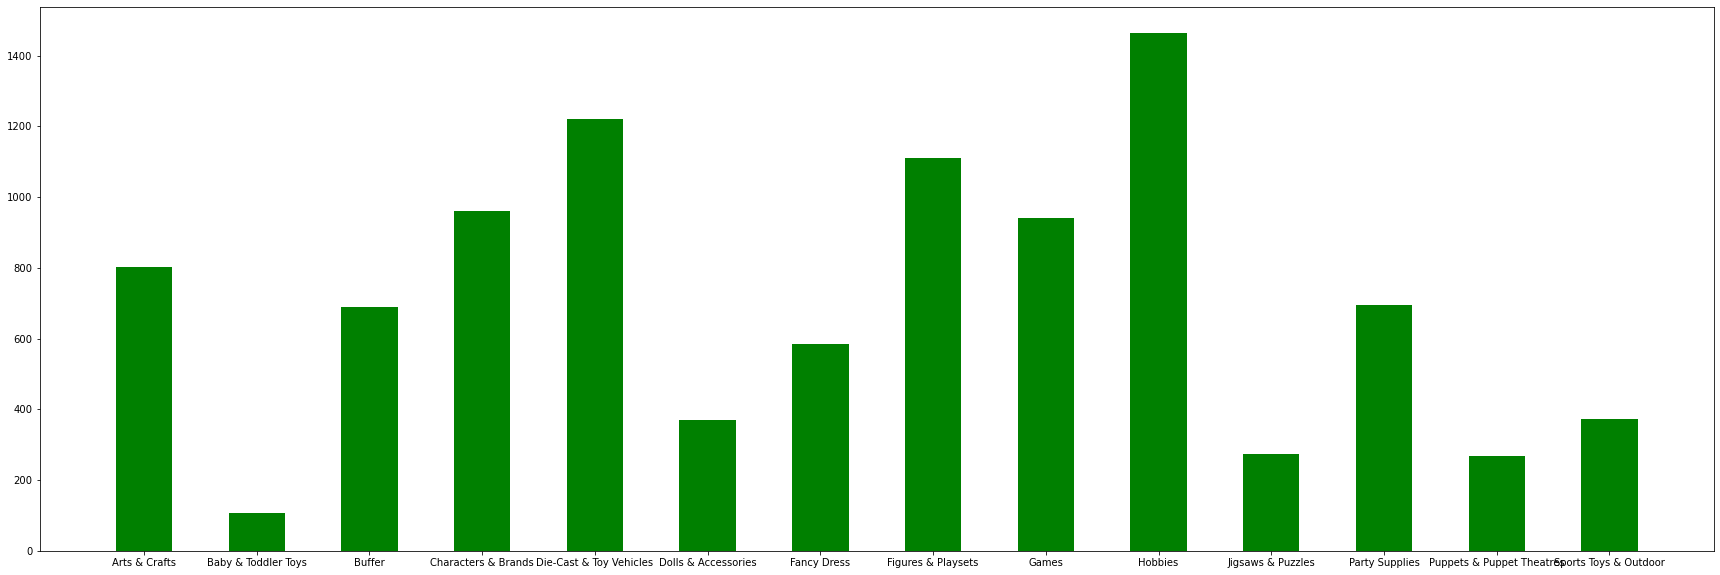

In [14]:
freq = {}
import matplotlib.pyplot as plt
def count_plot(arr):
    plt.figure(figsize=(30,10))
    
    for item in category:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
 
    for i in sorted(freq):
        print(i,freq[i])
        if(freq[i]>100):
            plt.bar(i, freq[i], color='g',width=0.5)


n=category.unique()
print('Total categories: ',len(n),' \n\n')
count_plot(n)

In [15]:
category.index[71]


71

## Missing Category DF

In [47]:
c=df[['product_name','amazon_category_and_sub_category', 'description']]
c=c[df['amazon_category_and_sub_category'].isnull()]
c=c.dropna(subset=['description'])
c

,product_name,amazon_category_and_sub_category,description
71,Power Trains Auto Loader City71,NaN,Power City Trains Auto Loader City
199,Smasha Ballz Ninjaaah199,NaN,Product Description The Smasha-Ballz have inva...
200,Moomins - 6.5 Inch Moominpappa Soft Toy - 2005...,NaN,6.5 inch soft toy
201,Classic Cuddly Paddington Bear by Rainbow Desi...,NaN,Please take care of this bear... Cuddly Paddin...
202,Charlie Bears Rainbow Teddy Bear from the Char...,NaN,Rainbow is from the 2015 collection
...,...,...,...
9113,Mega Bloks Halo 97134 - UNSC Night Ops Gaussho...,NaN,"Product Description Establish your army, build..."
9333,Fajiabao Educational Classic Electronic Racing...,NaN,Colour Name:style A High emulation car，props (...
9434,Hungry Hungry Hippos Elefun & Friends Board Ga...,NaN,Style Name:Friends-Board Game Hungry Hungry Hi...
9664,Friendship Charm Bracelet Jewellery Making Kit...,NaN,PIPPIN FRIENDSHIP CHARM BRACELET KIT - HEARTS ...


In [61]:
#trial
# c=df[['product_name','amazon_category_and_sub_category', 'description']]
# c=c[df['amazon_category_and_sub_category'].isnull()]
# c['description']=c['description'].fillna('Buffer')
# c

,product_name,amazon_category_and_sub_category,description
71,Power Trains Auto Loader City71,NaN,Power City Trains Auto Loader City
199,Smasha Ballz Ninjaaah199,NaN,Product Description The Smasha-Ballz have inva...
200,Moomins - 6.5 Inch Moominpappa Soft Toy - 2005...,NaN,6.5 inch soft toy
201,Classic Cuddly Paddington Bear by Rainbow Desi...,NaN,Please take care of this bear... Cuddly Paddin...
202,Charlie Bears Rainbow Teddy Bear from the Char...,NaN,Rainbow is from the 2015 collection
...,...,...,...
9445,Gibsons Pass the Pud Family Game with AmazonBa...,NaN,Buffer
9452,Pictionary Mania9452,NaN,Buffer
9664,Friendship Charm Bracelet Jewellery Making Kit...,NaN,PIPPIN FRIENDSHIP CHARM BRACELET KIT - HEARTS ...
9936,LONPOS 505 *Neu* [German Version]9936,NaN,Buffer


In [62]:
missing=c

In [71]:
#trial
# for i in missing.index:
#     print(i,missing['product_name'].iloc[i])

71 Pokemon Center Pokedoll 8.5 inch Shiny Gold Magikarp Plush Yellow Fish Toy273
199 LEGO Friends 41016: Advent Calendar626
200 Deluxe Mini Advent Calendar - Nostalgic House Tealight Lantern - Green House628
201 Elegant Lego Friends Advent Calendar 3316 With 24 Gifts, Mini Dolls, A Dog And Accessories631
202 Schleich Farm Christmas Advent Calendar632
203 LEGO City 7687 Advent Calendar 2009634
204 Traditional A4 Card Advent Calendar Deluxe - Nostalgic Victorian Christmas Carousel With Glitter Detail635
205 PLAYMOBIL 5217 SINTERKLAAS ADVENT KALENDER CALENDAR ZWARTE PIET SINT637
206 Polar Bears Advent Calendar638
207 Playmobil 3943 - Christmas Tree Decorations641
208 Large Perpetual Calendar (12x10x9.5cm) : Handcrafted Wood : Top Christmas Gift Idea : High Quality Traditional Wooden Xmas Present For Home, Desk or Mantel Piece!643
209 Playmobil 4163 Advent Calendar Knights' Tournament644
210 Playmobil 4153: Advent Calendar Knights646
211 Advent Gift Boxes Make Your Own Advent Calendar Kit6

IndexError: single positional indexer is out-of-bounds

In [74]:
# mapping2 = pd.Series(missing.index,index = missing['product_name'])
# for i in missing['product_name']:
#     index=mapping2[i]
#     print(index,missing['product_name'].iloc[index])

71 Pokemon Center Pokedoll 8.5 inch Shiny Gold Magikarp Plush Yellow Fish Toy273
199 LEGO Friends 41016: Advent Calendar626
200 Deluxe Mini Advent Calendar - Nostalgic House Tealight Lantern - Green House628
201 Elegant Lego Friends Advent Calendar 3316 With 24 Gifts, Mini Dolls, A Dog And Accessories631
202 Schleich Farm Christmas Advent Calendar632
203 LEGO City 7687 Advent Calendar 2009634
204 Traditional A4 Card Advent Calendar Deluxe - Nostalgic Victorian Christmas Carousel With Glitter Detail635
205 PLAYMOBIL 5217 SINTERKLAAS ADVENT KALENDER CALENDAR ZWARTE PIET SINT637
206 Polar Bears Advent Calendar638
207 Playmobil 3943 - Christmas Tree Decorations641
208 Large Perpetual Calendar (12x10x9.5cm) : Handcrafted Wood : Top Christmas Gift Idea : High Quality Traditional Wooden Xmas Present For Home, Desk or Mantel Piece!643
209 Playmobil 4163 Advent Calendar Knights' Tournament644
210 Playmobil 4153: Advent Calendar Knights646
211 Advent Gift Boxes Make Your Own Advent Calendar Kit6

IndexError: single positional indexer is out-of-bounds

In [63]:
#trial
# print(missing.index)

Int64Index([  71,  199,  200,  201,  202,  203,  204,  205,  206,  207,
            ...
            8078, 8923, 9113, 9333, 9434, 9445, 9452, 9664, 9936, 9961],
           dtype='int64', length=690)


In [67]:
#trial
# if 690 in missing.index:
#     print('690')

690


In [68]:
#trial
# df['product_name'].iloc[690]

'PERSONALISED EMBROIDERED STRIPEY CHRISTMAS STOCKING WITH NAME excluaive to 1stclassgifts st3690'

In [53]:
#trial
# for i in missing.index:
#     try:
#         ans=category_pred(missing['product_name'].iloc[i])
#         print(i,ans)
#     except IndexError:
#         print(i,' error occured')

71 Buffer
199 Buffer
200 Buffer
201 Buffer
202 Buffer
203 Buffer
204 Buffer
205 Buffer
206 Buffer
207 Buffer
208 Buffer
209 Figures & Playsets
210 Buffer
211 Buffer
212 Buffer
213 Figures & Playsets
214 Buffer
215 Buffer
216 Buffer
218 Buffer
219 Die-Cast & Toy Vehicles
220 Buffer
221 Buffer
222 Buffer
223 Buffer
224 Buffer
225 Buffer
226 Arts & Crafts
227 Buffer
228 Buffer
229 Buffer
230 Party Supplies
231 Buffer
232 Buffer
233 Buffer
234 Buffer
235 Buffer
237 Buffer
238 Buffer
239 Figures & Playsets
240 Buffer
241 Party Supplies
243 Musical Toy Instruments
244 Buffer
245 Bags
246 Buffer
247 Buffer
248 Buffer
249 Buffer
250 Figures & Playsets
251 Buffer
253 Buffer
254 Buffer
255 Buffer
256 Buffer
257 Buffer
258 Buffer
259 Buffer
260 Games
261 Figures & Playsets
262 Buffer
263 Buffer
264 Buffer
265 Buffer
266 Buffer
267 Buffer
268 Buffer
269 Buffer
270 Buffer
271 Buffer
272 Figures & Playsets
273 Arts & Crafts
274 Figures & Playsets
275 Buffer
276 Buffer
277 Buffer
278 Buffer
279 Buffe

In [37]:
#trial
# for i in missing['product_name']:
#     index=mapping[i]
#     ans=category_pred(i)
#     missing['amazon_category_and_sub_category'].iloc[index]=ans
# missing.head()

IndexError: iloc cannot enlarge its target object

## Category DF

In [18]:
category_df=df[['product_name','description','amazon_category_and_sub_category']].fillna('Buffer')
category_df.isnull().sum()

product_name                        0
description                         0
amazon_category_and_sub_category    0
dtype: int64

In [19]:
def main_category(x):
    n=x.find(' >')
    if(n>0):
        return x[:n]
    return x

category=category.apply( lambda x: main_category(x))
category_df['amazon_category_and_sub_category']=category

In [20]:
category_df.head()

,product_name,description,amazon_category_and_sub_category
0,Hornby 2014 Catalogue0,Product Description Hornby 2014 Catalogue Box ...,Hobbies
1,FunkyBuys® Large Christmas Holiday Express Fes...,Size Name:Large FunkyBuys® Large Christmas Hol...,Hobbies
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Hobbies
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd3,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Hobbies
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Product Description Hornby RailRoad 0-4-0 Gild...,Hobbies


## Classification

In [21]:
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue0,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd3,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


## Vectorization

In [22]:
tfidf = TfidfVectorizer(stop_words='english')

overview_matrix = tfidf.fit_transform(category_df['description'])
overview_matrix2 = tfidf.fit_transform(category_df['product_name'])

similarity_matrix = linear_kernel(overview_matrix,overview_matrix)
similarity_matrix2 = linear_kernel(overview_matrix2,overview_matrix2)

print('\n\n similarity_matrix2: \n',similarity_matrix)


mapping



 similarity_matrix2: 
 [[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.15582528 ... 0.         0.         0.        ]
 [0.         0.15582528 1.         ... 0.         0.00685409 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.01698311 0.        ]
 [0.         0.         0.00685409 ... 0.01698311 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


product_name
Hornby 2014 Catalogue0                                                                                                        0
FunkyBuys® Large Christmas Holiday Express Festive Train Set (SI-TY1017) Toy Light / Sounds / Battery Operated & Smoke1       1
CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT ENGINE BOXED BOYS KIDS BATTERY2                                                   2
HORNBY Coach R4410A BR Hawksworth Corridor 3rd3                                                                               3
Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam Locomotive Model4                                                              4
                                                                                                                           ... 
Batman 1966 TV Series Action Figures - The Riddler9995                                                                     9995
Star Wars Costume, Kids Stormtrooper Costume Style 4, Medium, HEIGHT 4' 2" - 4' 6"9996     

In [23]:
def category_pred(df_input):
    
    def description(df_input):
        df_index = mapping[df_input]
        similarity_score = list(enumerate(similarity_matrix[df_index]))
        similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
        similarity_score = similarity_score[1:2]
#         print(similarity_score)
        df_indices = [i[0] for i in similarity_score]
        return (similarity_score)
    
    def name(df_input):
        df_index = mapping[df_input]
        similarity_score = list(enumerate(similarity_matrix2[df_index]))
        similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
        similarity_score = similarity_score[1:2]
#         print(similarity_score)
        df_indices = [i[0] for i in similarity_score]
        return (similarity_score)
    
    df_index = mapping[df_input]
    
    d=description(df_input)
    n=name(df_input)
    
    if d[0][1]<n[0][1]:
        index=n[0][0]
    else:
        index=d[0][0]
#     print(df_input,mapping[df_input],category_df['product_name'].iloc[df_index])

#     def fill_cat(index):
#        df['amazon_category_and_sub_category'].iloc[df_index]=df['amazon_category_and_sub_category'].iloc[index]
#        print(df_input,' ',category_df['amazon_category_and_sub_category'].iloc[index],'\n\n')

        
#     fill_cat(index)
    return(category_df['amazon_category_and_sub_category'].iloc[index])

In [24]:
print(category_pred('Smasha Ballz Ninjaaah199'))

Buffer


In [25]:
category_df.iloc[6199]

product_name                        Hollywood/Movie Night Theme Party - Giant Bann...
description                                                                    Buffer
amazon_category_and_sub_category                                       Party Supplies
Name: 6199, dtype: object

In [26]:
category_df.iloc[2206]

product_name                                         Parrot Bebop Drone 2 (White)2206
description                         Colour Name:White and Black Product Descriptio...
amazon_category_and_sub_category                                              Hobbies
Name: 2206, dtype: object

In [27]:
mapping.index[2206]

'Parrot Bebop Drone 2 (White)2206'

In [28]:
for i in missing['product_name']:
    category_pred(i)

# Testing

In [29]:
mapping['FunkyBuys® Large Christmas Holiday Express Festive Train Set (SI-TY1017) Toy Light / Sounds / Battery Operated & Smoke1']

1

In [30]:
match=0
mismatch=0
freq2={}
for i in category_df['product_name'][1:10000]:
    index=mapping[i]
    s=category_df['amazon_category_and_sub_category'].iloc[index]
    ans=category_pred(i)
    
    if s==ans:
        match+=1
    else:
        mismatch+=1
        
    if ans in freq2:
        freq2[ans]+=1
    else:
        freq2[ans]=1
    #print(s,ans)

In [31]:
print(match,mismatch)
print(" Accuracy: ",match*0.01,"%")

6993 3006
 Accuracy:  69.93 %


Arts & Crafts 715
Baby & Toddler Toys 94
Bags 5
Bedding & Linens 3
Buffer 1287
Car Parts 1
Characters & Brands 958
Die-Cast & Toy Vehicles 1187
Dolls & Accessories 299
Educational Toys 4
Electronic Toys 2
Fancy Dress 554
Figures & Playsets 1082
Games 837
Gardening 3
Hobbies 1387
Home Accessories 4
Indoor Lighting 2
Jigsaws & Puzzles 256
Medication & Remedies 4
Musical Toy Instruments 13
Novelty & Special Use 8
Office Supplies 12
Party Supplies 617
Pens, Pencils & Writing Supplies 4
Pretend Play 41
Puppets & Puppet Theatres 273
Sports Toys & Outdoor 340
Supporters' Gear 1
Women 2
Worlds Apart 4


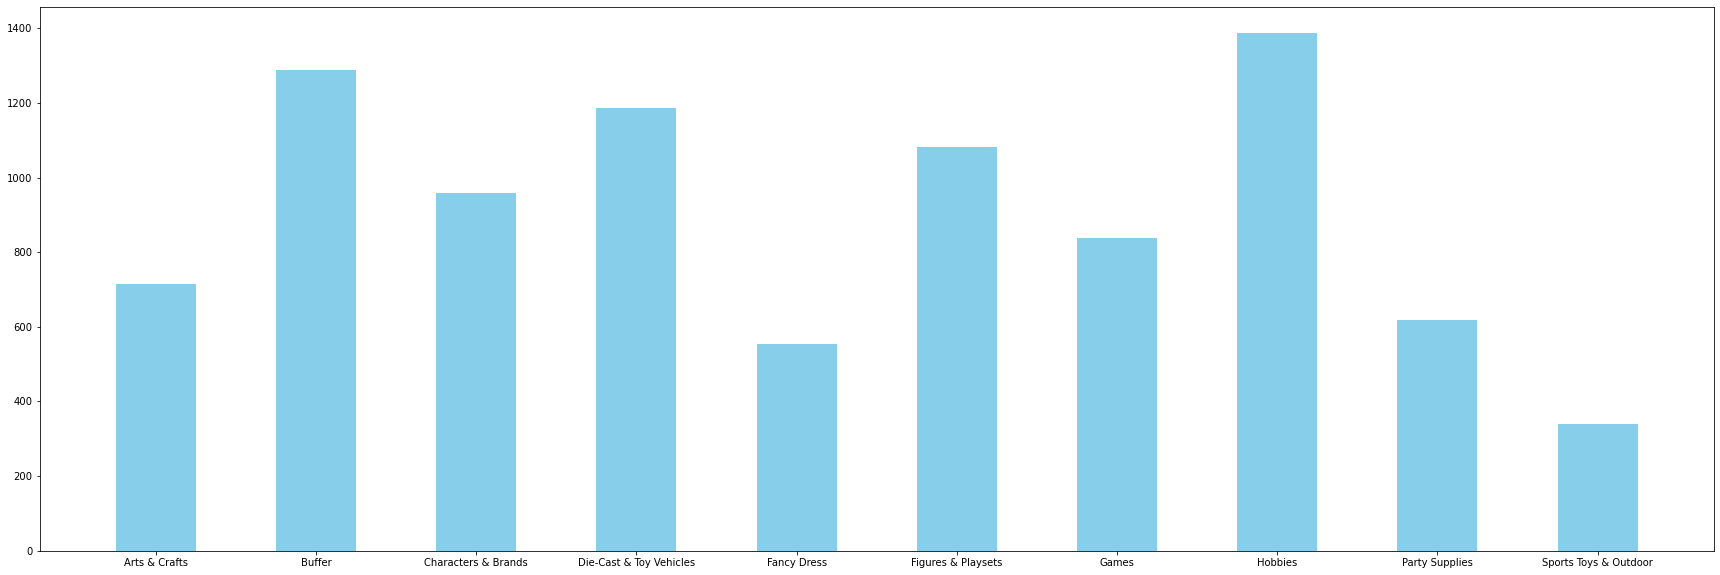

In [32]:
plt.figure(figsize=(30,10))
for i in sorted(freq2):
    print(i,freq2[i])
    if(freq2[i]>300):
        plt.bar(i, freq2[i], color='skyblue',width=0.5)

In [33]:
len(freq2)

31

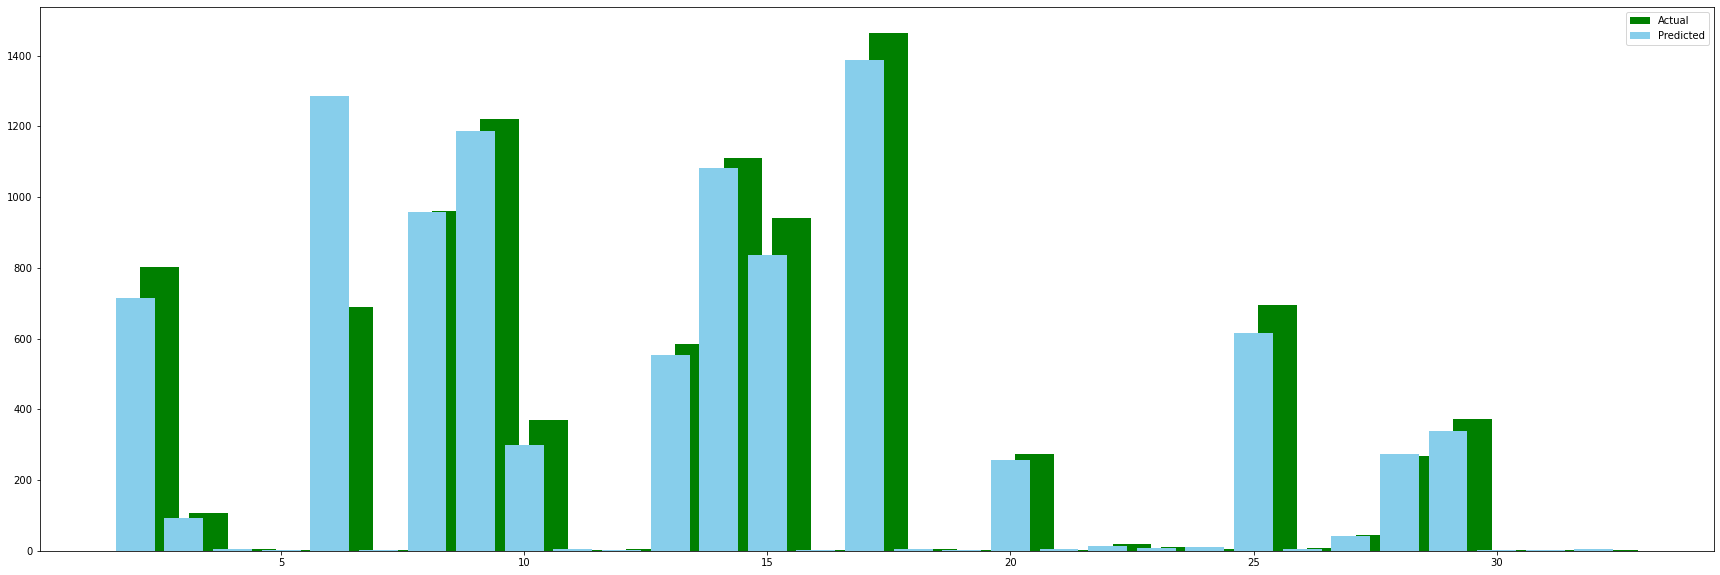

In [34]:
j=1
plt.figure(figsize=(30,10))
for i in sorted(freq2):
    j+=1
    plt.bar(j+0.5,freq[i],color='green')
    plt.bar(j,freq2[i],color='skyblue')
plt.legend(['Actual','Predicted'])

In [35]:
print(sorted(freq.values()))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 7, 11, 19, 45, 106, 269, 274, 371, 372, 585, 690, 694, 802, 941, 960, 1111, 1221, 1464]


In [36]:
print(sorted(freq2.values()))

[1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 4, 4, 5, 8, 12, 13, 41, 94, 256, 273, 299, 340, 554, 617, 715, 837, 958, 1082, 1187, 1287, 1387]
